In [1]:
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
f = h5py.File("/content/drive/MyDrive/train_catvnoncat.h5")
train_images = tf.cast(tf.constant(f["train_set_x"]), tf.float32)
train_labels = tf.cast(tf.constant(f["train_set_y"]), tf.float32)

f = h5py.File("/content/drive/MyDrive/test_catvnoncat.h5")
test_images = tf.cast(tf.constant(f["test_set_x"]), tf.float32)
test_labels = tf.cast(tf.constant(f["test_set_y"]), tf.float32)

classes = tf.constant(f["list_classes"])

In [3]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(209, 64, 64, 3) (209,) (50, 64, 64, 3) (50,)


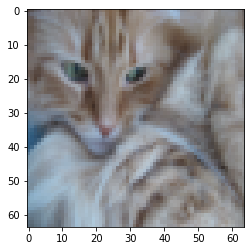

In [4]:
plt.imshow(train_images[2]/255.0) # substitute 2 for other index to see other image
plt.show()

# Model 1: CNN from scratch

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(64, 64, 3)),
  tf.keras.layers.Conv2D(filters=4, kernel_size=4, padding="valid", activation="relu"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(filters=8, kernel_size=4, padding="valid", activation="relu"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(filters=16, kernel_size=4, padding="valid", activation="relu"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 4)         196       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 8)         520       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 16)         0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.CosineDecay(0.001, 400, alpha=0.5)), loss=tf.keras.losses.BinaryCrossentropy(), metrics=tf.keras.metrics.BinaryAccuracy())

In [9]:
train_labels = train_labels[:, tf.newaxis]
test_labels = test_labels[:, tf.newaxis]

In [10]:
history = model.fit(x=train_images, y=train_labels, batch_size=32, epochs=200, validation_data=(test_images, test_labels))

Epoch 1/200
7/7 [==============================] - 10s 39ms/step - loss: 0.6524 - binary_accuracy: 0.6124 - val_loss: 0.9108 - val_binary_accuracy: 0.3400
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 0.6134 - binary_accuracy: 0.6555 - val_loss: 0.7966 - val_binary_accuracy: 0.3400
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.5936 - binary_accuracy: 0.6555 - val_loss: 0.8151 - val_binary_accuracy: 0.3400
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.5709 - binary_accuracy: 0.6555 - val_loss: 0.7415 - val_binary_accuracy: 0.3400
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.5496 - binary_accuracy: 0.6555 - val_loss: 0.7394 - val_binary_accuracy: 0.3400
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.5206 - binary_accuracy: 0.6507 - val_loss: 0.7442 - val_binary_accuracy: 0.3800
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.5008 - 

If you are in a Colab Notebook, you can try switching the runtime type to a GPU by clicking Runtime -> Change Runtime Type and then selecting GPU as the Hardware Accelerator. This should deliver a pretty big speed-up.

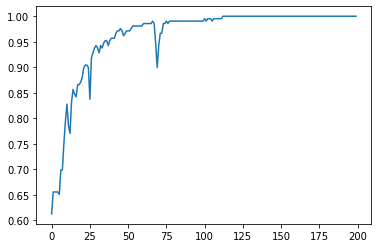

In [11]:
plt.plot(history.history["binary_accuracy"])

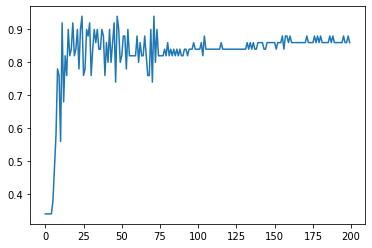

In [12]:
plt.plot(history.history["val_binary_accuracy"])

----------------------
Predicted: cat
Actual: cat


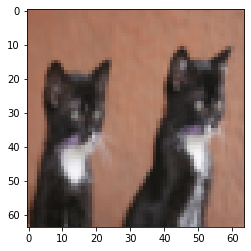

----------------------
----------------------
Predicted: cat
Actual: cat


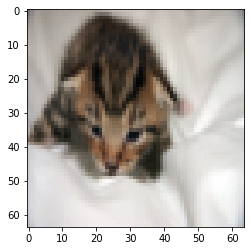

----------------------
----------------------
Predicted: not cat
Actual: cat


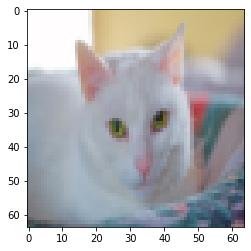

----------------------
----------------------
Predicted: cat
Actual: cat


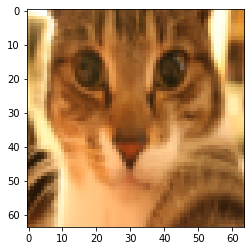

----------------------
----------------------
Predicted: cat
Actual: cat


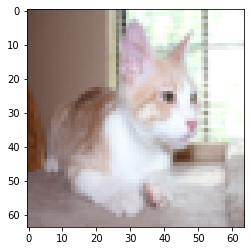

----------------------
----------------------
Predicted: not cat
Actual: not cat


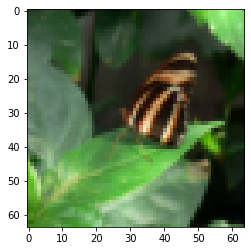

----------------------
----------------------
Predicted: cat
Actual: cat


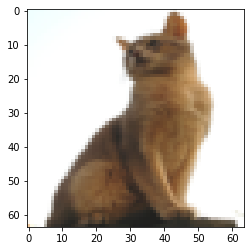

----------------------
----------------------
Predicted: cat
Actual: cat


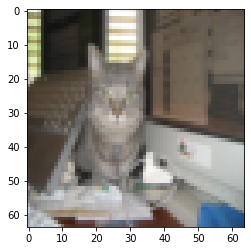

----------------------
----------------------
Predicted: cat
Actual: cat


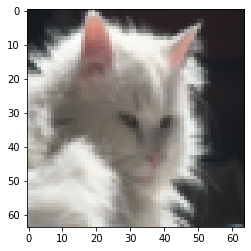

----------------------
----------------------
Predicted: cat
Actual: cat


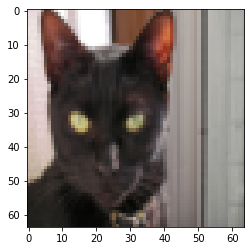

----------------------
----------------------
Predicted: cat
Actual: cat


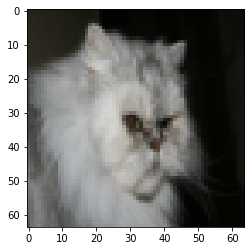

----------------------
----------------------
Predicted: cat
Actual: cat


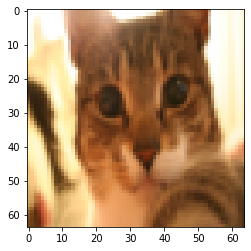

----------------------
----------------------
Predicted: cat
Actual: cat


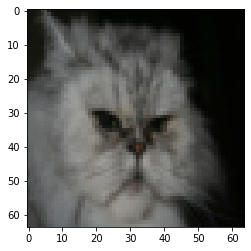

----------------------
----------------------
Predicted: cat
Actual: not cat


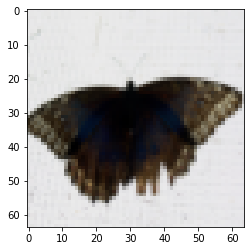

----------------------
----------------------
Predicted: not cat
Actual: not cat


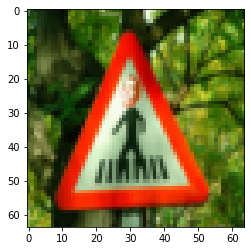

----------------------
----------------------
Predicted: cat
Actual: cat


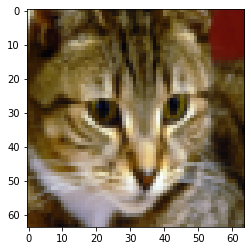

----------------------
----------------------
Predicted: not cat
Actual: not cat


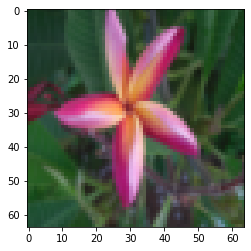

----------------------
----------------------
Predicted: cat
Actual: cat


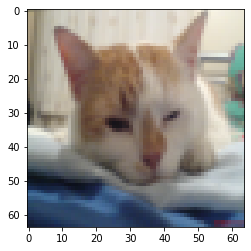

----------------------
----------------------
Predicted: cat
Actual: cat


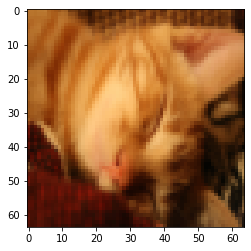

----------------------
----------------------
Predicted: not cat
Actual: cat


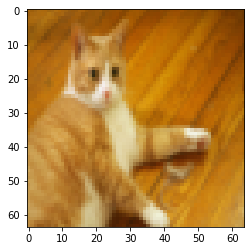

----------------------
----------------------
Predicted: cat
Actual: cat


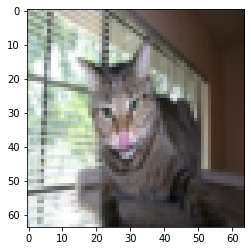

----------------------
----------------------
Predicted: not cat
Actual: not cat


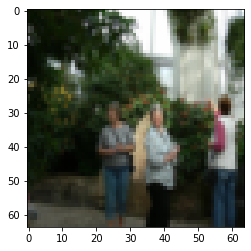

----------------------
----------------------
Predicted: not cat
Actual: not cat


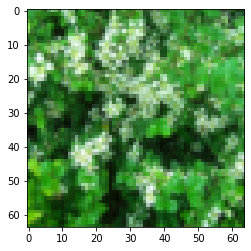

----------------------
----------------------
Predicted: cat
Actual: cat


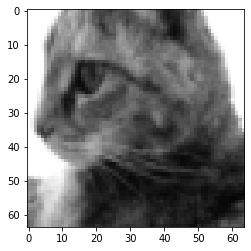

----------------------
----------------------
Predicted: cat
Actual: cat


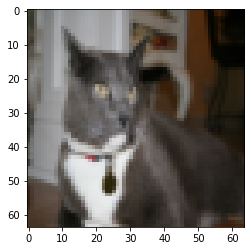

----------------------
----------------------
Predicted: cat
Actual: cat


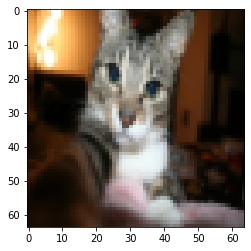

----------------------
----------------------
Predicted: cat
Actual: cat


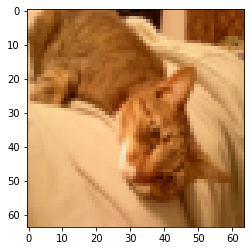

----------------------
----------------------
Predicted: not cat
Actual: not cat


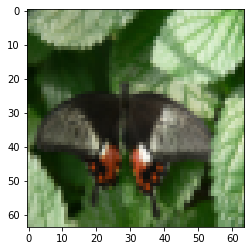

----------------------
----------------------
Predicted: cat
Actual: cat


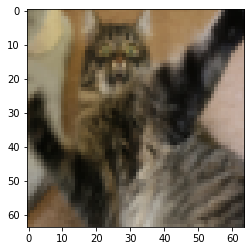

----------------------
----------------------
Predicted: not cat
Actual: not cat


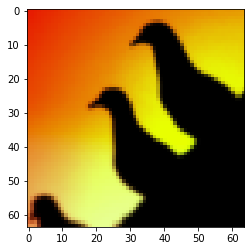

----------------------
----------------------
Predicted: not cat
Actual: cat


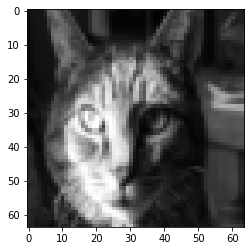

----------------------
----------------------
Predicted: cat
Actual: cat


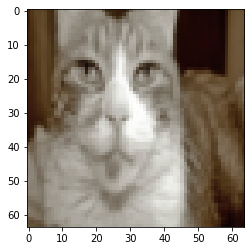

----------------------
----------------------
Predicted: not cat
Actual: cat


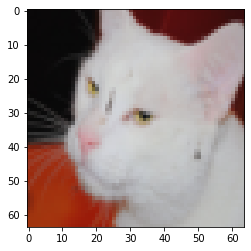

----------------------
----------------------
Predicted: cat
Actual: cat


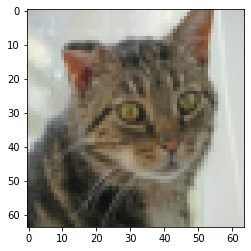

----------------------
----------------------
Predicted: not cat
Actual: not cat


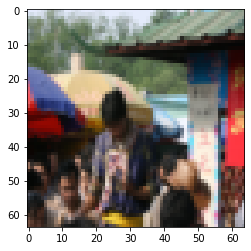

----------------------
----------------------
Predicted: not cat
Actual: not cat


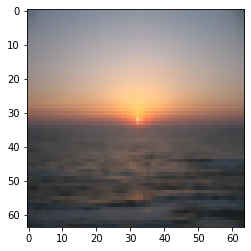

----------------------
----------------------
Predicted: not cat
Actual: not cat


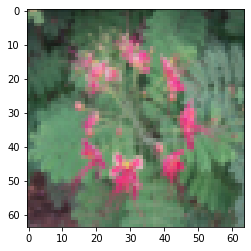

----------------------
----------------------
Predicted: cat
Actual: cat


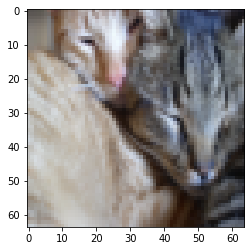

----------------------
----------------------
Predicted: not cat
Actual: not cat


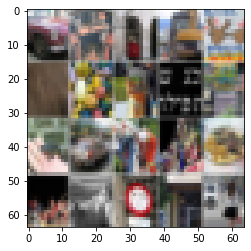

----------------------
----------------------
Predicted: not cat
Actual: not cat


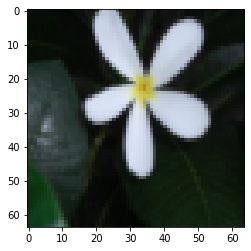

----------------------
----------------------
Predicted: cat
Actual: cat


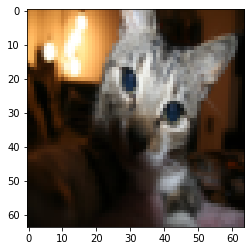

----------------------
----------------------
Predicted: not cat
Actual: cat


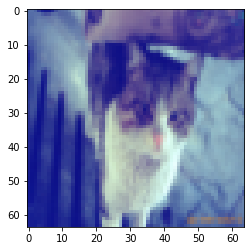

----------------------
----------------------
Predicted: cat
Actual: cat


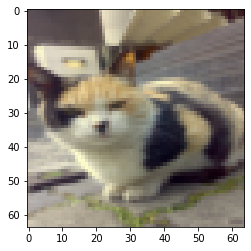

----------------------
----------------------
Predicted: not cat
Actual: not cat


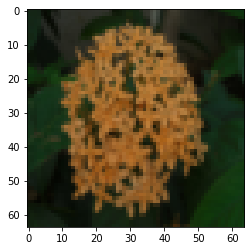

----------------------
----------------------
Predicted: not cat
Actual: not cat


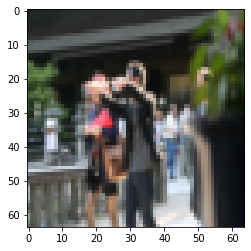

----------------------
----------------------
Predicted: not cat
Actual: not cat


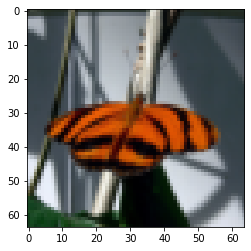

----------------------
----------------------
Predicted: cat
Actual: cat


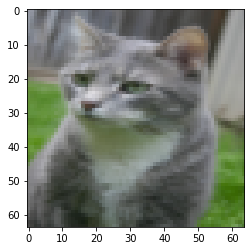

----------------------
----------------------
Predicted: cat
Actual: cat


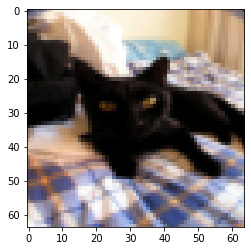

----------------------
----------------------
Predicted: not cat
Actual: cat


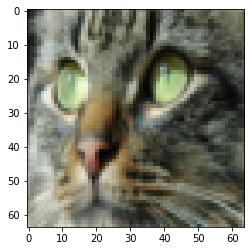

----------------------
----------------------
Predicted: not cat
Actual: not cat


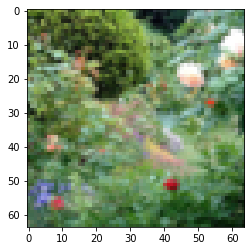

----------------------


In [13]:
for i in range(len(test_images)):
    current = test_images[i]
    prediction = model(current[tf.newaxis], training=False)
    prediction = "cat" if prediction > 0.5 else "not cat"
    label = "cat" if test_labels[i] == 1 else "not cat"
    print("----------------------")
    print(f"Predicted: {prediction}")
    print(f"Actual: {label}")
    plt.imshow(current)
    plt.show()
    print("----------------------")

# Model 2: Transfer Learning

Here, you will need to **restart the runtime** in order for things to work properly, since the upcoming model expects a different input distribution than the previous one.

1.   Click Runtime -> Restart Runtime or use the keyboard shortcut ⌘/Ctrl+M if you are in a Colab Notebook, Kernel -> Restart if you are in a Jupyter Notebook, or equivalent actions to restart the runtime.
2.   Run the Loading Data section, but **do not run the input normalization step (i.e. do not divide the images by 255.0)!**

In [5]:
backbone = tf.keras.applications.EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=(64, 64, 3),
    pooling="avg"
)

43950080/43941136 [==============================] - 0s 0us/step


In [6]:
# Freeze the backbone
backbone.trainable = False

In [7]:
model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Dense(750, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 dense (Dense)               (None, 750)               1152750   
                                                                 
 dense_1 (Dense)             (None, 1)                 751       
                                                                 
Total params: 11,937,036
Trainable params: 1,153,501
Non-trainable params: 10,783,535
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.CosineDecay(0.001, 400, alpha=0.5)), loss=tf.keras.losses.BinaryCrossentropy(), metrics=tf.keras.metrics.BinaryAccuracy())

In [10]:
train_labels = train_labels[:, tf.newaxis]
test_labels = test_labels[:, tf.newaxis]

In [11]:
history = model.fit(x=train_images, y=train_labels, batch_size=32, epochs=200, validation_data=(test_images, test_labels))

Epoch 1/200
7/7 [==============================] - 13s 416ms/step - loss: 0.5033 - binary_accuracy: 0.7321 - val_loss: 0.1515 - val_binary_accuracy: 0.9400
Epoch 2/200
7/7 [==============================] - 0s 30ms/step - loss: 0.2445 - binary_accuracy: 0.9043 - val_loss: 0.1423 - val_binary_accuracy: 0.9400
Epoch 3/200
7/7 [==============================] - 0s 31ms/step - loss: 0.0992 - binary_accuracy: 0.9569 - val_loss: 0.3507 - val_binary_accuracy: 0.8200
Epoch 4/200
7/7 [==============================] - 0s 31ms/step - loss: 0.0756 - binary_accuracy: 0.9713 - val_loss: 0.2043 - val_binary_accuracy: 0.9400
Epoch 5/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0447 - binary_accuracy: 0.9904 - val_loss: 0.1752 - val_binary_accuracy: 0.9400
Epoch 6/200
7/7 [==============================] - 0s 31ms/step - loss: 0.0393 - binary_accuracy: 0.9952 - val_loss: 0.1781 - val_binary_accuracy: 0.9400
Epoch 7/200
7/7 [==============================] - 0s 35ms/step - loss: 0.

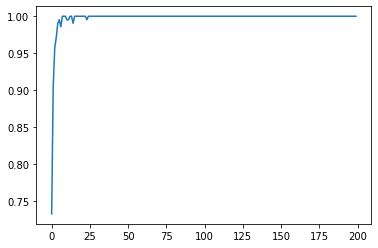

In [12]:
plt.plot(history.history["binary_accuracy"])

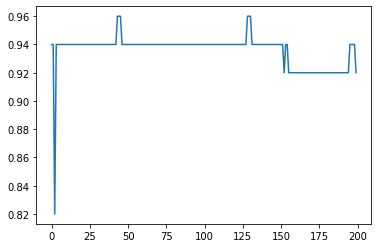

In [13]:
plt.plot(history.history["val_binary_accuracy"])